## Logistic Regression can be used to predict value of a  numerical catogorical variable   

## Linear Regression is used for numeric continuos variable

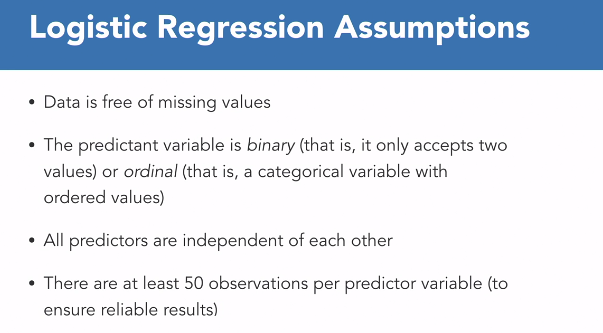

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import sklearn

from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score


In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 5 , 4
sb.set_style('whitegrid')

In [6]:
address = r'C:\Users\Dell\Python For Data Science\Data\titanic-training-data.csv'

titanic_training = pd.read_csv(address )
titanic_training.columns = ['PassID' , 'Sur' , 'Pclass' , 'Name' , 'Sex' , 'Age' , 'Sibsp' , 'Parch' , 'Ticket' , 'Fare' , 'Cabin' , 'Embarked']

titanic_training.head()

,PassID,Sur,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(titanic_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PassID    891 non-null    int64  
 1   Sur       891 non-null    int64  
 2   Pclass    891 non-null    int64  
 3   Name      891 non-null    object 
 4   Sex       891 non-null    object 
 5   Age       714 non-null    float64
 6   Sibsp     891 non-null    int64  
 7   Parch     891 non-null    int64  
 8   Ticket    891 non-null    object 
 9   Fare      891 non-null    float64
 10  Cabin     204 non-null    object 
 11  Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Checking that our target is binary

<AxesSubplot:xlabel='Sur', ylabel='count'>

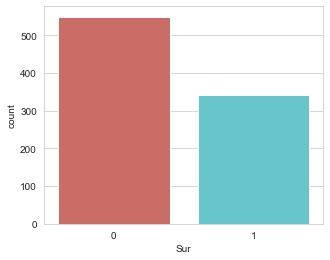

In [8]:
sb.countplot(x = 'Sur' , data=titanic_training , palette = 'hls' )

In [9]:
titanic_training.isnull().sum()

PassID        0
Sur           0
Pclass        0
Name          0
Sex           0
Age         177
Sibsp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
titanic_training.describe()

,PassID,Sur,Pclass,Age,Sibsp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic_data = titanic_training.drop(['Name' , 'Ticket' , 'Cabin'] , axis = 1)

In [12]:
titanic_data.head()

,PassID,Sur,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [13]:
titanic_data.isnull().sum()

PassID        0
Sur           0
Pclass        0
Sex           0
Age         177
Sibsp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='Age'>

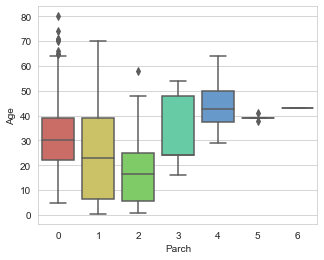

In [14]:
sb.boxplot(x = 'Parch' , y = 'Age' , data = titanic_data , palette = 'hls')

In [15]:
Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean()

,PassID,Sur,Pclass,Age,Sibsp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [16]:
def age_approx(cols):
    Age = cols[0]
    Parch = cols[1]
    
    if pd.isnull(Age):
        if Parch == 0:
            return 32
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 45
        else:
            return 30
    else:
        return Age
   

In [17]:
titanic_data['Age'] = titanic_data[['Age' , 'Parch']].apply(age_approx , axis = 1)
titanic_data.isnull().sum()

PassID      0
Sur         0
Pclass      0
Sex         0
Age         0
Sibsp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [18]:
titanic_data.dropna(inplace = True)
titanic_data.reset_index(inplace = True , drop = True)

print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PassID    889 non-null    int64  
 1   Sur       889 non-null    int64  
 2   Pclass    889 non-null    int64  
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   Sibsp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB
None


## Coverting categorical variables to a dummy indicators

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = titanic_data['Sex']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [20]:
titanic_data.head()

,PassID,Sur,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [21]:
gender_df = pd.DataFrame(gender_encoded , columns = ['male_gender'])
gender_df.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


In [22]:
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
binary_encoder = OneHotEncoder(categories = 'auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1 , 1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_DF = pd.DataFrame(embarked_1hot_mat , columns = ['c' , 'Q' , 'S'])
embarked_DF.head()

,c,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [25]:
titanic_data.drop(['Sex' , 'Embarked'] , axis = 1 , inplace = True)
titanic_data.head()

,PassID,Sur,Pclass,Age,Sibsp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [30]:
titanic_dmy = pd.concat([titanic_data , gender_df , embarked_DF] , axis= 1, verify_integrity = True).astype(float)
titanic_dmy.head()

,PassID,Sur,Pclass,Age,Sibsp,Parch,Fare,male_gender,c,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


Checking Variables are independent of one another which is required ,      
corr() > |0.5| tells us that they are dependent so we drop them

In [37]:
titanic_dmy.corr()

,PassID,Sur,Pclass,Age,Sibsp,Parch,Fare,male_gender,c,Q,S
PassID,1.000000,-0.005028,-0.035330,0.026945,-0.057686,-0.001657,0.012703,0.043136,-0.001208,-0.033694,0.022269
Sur,-0.005028,1.000000,-0.335549,-0.072126,-0.034040,0.083151,0.255290,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.328299,0.081656,0.016824,-0.548193,0.127741,-0.245733,0.220558,0.076466
Age,0.026945,-0.072126,-0.328299,1.000000,-0.295432,-0.220454,0.076341,0.103011,0.034083,0.012844,-0.037949
Sibsp,-0.057686,-0.034040,0.081656,-0.295432,1.000000,0.414542,0.160887,-0.116348,-0.060074,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.220454,0.414542,1.000000,0.217532,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.076341,0.160887,0.217532,1.000000,-0.179958,0.270731,-0.116684,-0.163758
male_gender,0.043136,-0.541585,0.127741,0.103011,-0.116348,-0.247508,-0.179958,1.000000,-0.084520,-0.075217,0.121405
c,-0.001208,0.169966,-0.245733,0.034083,-0.060074,-0.011588,0.270731,-0.084520,1.000000,-0.148646,-0.782613
Q,-0.033694,0.004536,0.220558,0.012844,-0.026692,-0.081585,-0.116684,-0.075217,-0.148646,1.000000,-0.499261


<AxesSubplot:>

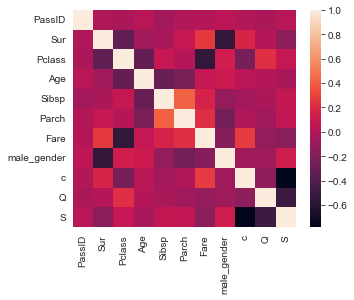

In [38]:
sb.heatmap(titanic_dmy.corr())

In [39]:
titanic_dmy.drop(['Fare' , 'Pclass'] , axis = 1 , inplace = True)
titanic_dmy.head()

,PassID,Sur,Age,Sibsp,Parch,male_gender,c,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [40]:
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassID       889 non-null    float64
 1   Sur          889 non-null    float64
 2   Age          889 non-null    float64
 3   Sibsp        889 non-null    float64
 4   Parch        889 non-null    float64
 5   male_gender  889 non-null    float64
 6   c            889 non-null    float64
 7   Q            889 non-null    float64
 8   S            889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB


In [47]:
X_train , X_test , y_train , y_test = train_test_split(titanic_dmy.drop(['Sur'] , axis = 1), 
                                                      titanic_dmy['Sur'] , test_size = 0.2 , random_state = 200)

In [48]:
print(X_train.shape)
print(y_train.shape)

(711, 8)
(711,)


In [49]:
X_train[0:5]

,PassID,Age,Sibsp,Parch,male_gender,c,Q,S
719,721.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0
165,167.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0
879,882.0,33.0,0.0,0.0,1.0,0.0,0.0,1.0
451,453.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
181,183.0,9.0,4.0,2.0,1.0,0.0,0.0,1.0


### Deploying and evaluating model

In [53]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train , y_train)

LogisticRegression(solver='liblinear')

In [55]:
y_pred = LogReg.predict(X_test)

In [56]:
print(classification_report(y_test  , y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [58]:
y_train_pred = cross_val_predict(LogReg , X_train , y_train , cv = 5)
confusion_matrix(y_train , y_train_pred)

array([[377,  63],
       [ 91, 180]], dtype=int64)

In [61]:
precision_score(y_train , y_train_pred)

0.7407407407407407

In [62]:
titanic_dmy[863:864]

,PassID,Sur,Age,Sibsp,Parch,male_gender,c,Q,S
863,866.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
test_passenger = np.array([866 , 40 , 0 , 0 , 0, 0, 0, 1]).reshape(1 , -1)
test_passenger

array([[866,  40,   0,   0,   0,   0,   0,   1]])

In [74]:
print(LogReg.predict(test_passenger))

[1.]


In [67]:
print(LogReg.predict_proba(test_passenger))

[[0.26351831 0.73648169]]
